## Scattering parameters for potassium-40

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from amo.constants import *

from general.plot_settings import colors, paper_settings

plt.rcParams.update(paper_settings)
figsize = (4.5, 2.5)

## p-Wave scattering parameters

Define the 3D scattering parameters for $M_L = \pm 1$ (198.3 G) and $M_L = 0$ (198.8 G) resonances. Uses the effective range form from DJM Ahmed-Braun, et al (2021).

In [2]:
from functools import partial
from amo.resonant_scattering import V3D, inv_R3D, V3D_m0, inv_R3D_m0, EB_3D, \
                            quasibound_state_halfwidth

Plot the 3D scattering parameters

f:\GitHub\ChiPyLab\amo\resonant_scattering.py:99: RuntimeWarning: invalid value encountered in power
  Gamma = E0**(3/2) / np.sqrt(ER)


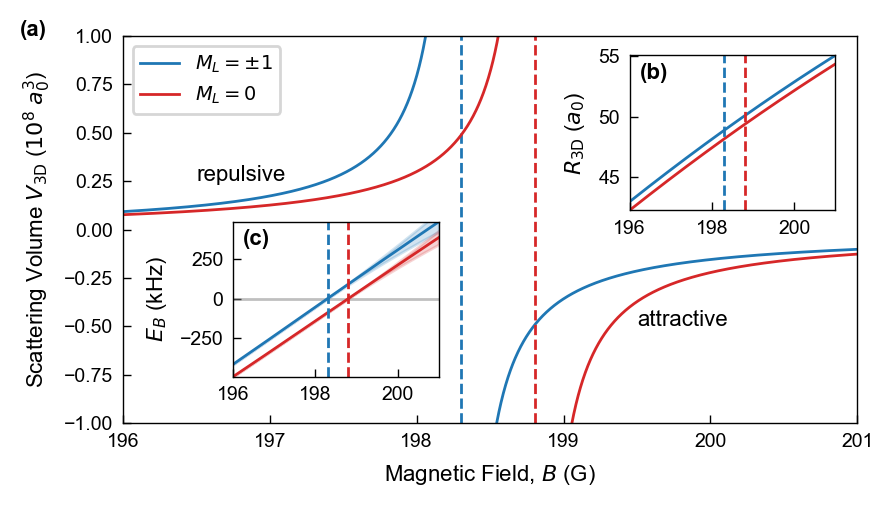

In [26]:
fig, ax = plt.subplots(1,1, figsize=figsize)

num = 1000
delta = 0.01
Bmin = 196
Bmax = 201
B = np.linspace(Bmin, Bmax, num)  # G
B_V = [np.linspace(Bmin, B0_77_pm1 - delta, num), 
                 np.linspace(B0_77_pm1 + delta, Bmax, num)]
B_V_m0 = [np.linspace(Bmin, B0_77_0 - delta, num), 
                 np.linspace(B0_77_0 + delta, Bmax, num)]

# ax = axs[1]
ymin = -1
ymax = 1
xlabel = r'Magnetic Field, $B$ (G)'
ylabel = r"Scattering Volume $V_\mathrm{3D}$ ($10^8$ $a_0^3$)"
ax.set(ylabel=ylabel, xlabel=xlabel)
ax.set(xlim=(Bmin, Bmax))

ax.plot(B_V[0], V3D(B_V[0])/a_0**3 / 1e8, '-', label=r"$M_L=\pm 1$", color=colors[0])
ax.plot(B_V[1], V3D(B_V[1])/a_0**3 / 1e8, '-', color=colors[0])
ax.vlines(B0_77_pm1, ymin, ymax, colors=colors[0], linestyles='--')

ax.plot(B_V_m0[0], V3D_m0(B_V_m0[0])/a_0**3 / 1e8, '-', label=r"$M_L=0$", color=colors[3])
ax.plot(B_V_m0[1], V3D_m0(B_V_m0[1])/a_0**3 / 1e8, '-', color=colors[3])
ax.vlines(B0_77_0, ymin, ymax, colors=colors[3], linestyles='--')

ax.text(196.5, 0.25, "repulsive", fontsize=8)
ax.text(199.5, -0.5, "attractive", fontsize=8)
ax.set_ylim(ymin, ymax)
ax.legend(loc="upper left", fontsize=7)

ax_inset = ax.inset_axes([0.69, 0.55, 0.28, 0.4])

# Effective range inset
ylabel = r"$R_\mathrm{3D}$ ($a_0$)"
ymax = np.max(1/inv_R3D(B)/a_0)
ymin = np.min(1/inv_R3D_m0(B)/a_0)
ax_inset.set(ylabel=ylabel, xlim=(Bmin, Bmax), ylim=(ymin, ymax))
# ax.set_box_aspect(0.8)
ax_inset.plot(B, 1/inv_R3D(B)/a_0, '-', label=r"$M_L=\pm 1$", color=colors[0])
ax_inset.plot(B, 1/inv_R3D_m0(B)/a_0, '-', label=r"$M_L=0$", color=colors[3])
ax_inset.vlines(B0_77_pm1, ymin, ymax, colors=colors[0], linestyles='--')
ax_inset.vlines(B0_77_0, ymin, ymax, colors=colors[3], linestyles='--')
ax_inset.set_xticks([196, 198, 200])
ax_inset.set_xticklabels(["196", "198", "200"])


# Binding energy inset
ax_inset2 = ax.inset_axes([0.15, 0.12, 0.28, 0.4])
ymax = np.max(EB_3D(V3D(B), inv_R3D(B))/1e3/h)
ymin = np.min(EB_3D(V3D_m0(B), inv_R3D_m0(B))/1e3/h)

ylabel = r"$E_B$ (kHz)"
ax_inset2.set(ylabel=ylabel, xlim=(Bmin, Bmax), ylim=(ymin, ymax))
ax_inset2.hlines(0, Bmin, Bmax, colors='gray', linestyles='-', alpha=0.5)
# ax.set_box_aspect(0.8)

EB = EB_3D(V3D(B), inv_R3D(B))/1e3/h
gamma = quasibound_state_halfwidth(V3D(B), inv_R3D(B))/1e3/h
y_upper = EB + gamma
y_lower = EB - gamma
ax_inset2.plot(B, EB, '-', label=r"$M_L=\pm 1$", color=colors[0])
ax_inset2.fill_between(B, y_lower, y_upper, color=colors[0], alpha=0.2)

EB_m0 = EB_3D(V3D_m0(B), inv_R3D_m0(B))/1e3/h
gamma = quasibound_state_halfwidth(V3D_m0(B), inv_R3D_m0(B))/1e3/h
y_upper = EB_m0 + gamma
y_lower = EB_m0 - gamma
ax_inset2.plot(B, EB_m0, '-', label=r"$M_L=0$", color=colors[3])
ax_inset2.fill_between(B, y_lower, y_upper, color=colors[3], alpha=0.2)

ax_inset2.vlines(B0_77_pm1, ymin, ymax, colors=colors[0], linestyles='--')
ax_inset2.vlines(B0_77_0, ymin, ymax, colors=colors[3], linestyles='--')


# ax.legend(fontsize=8, loc="upper left")

fig.tight_layout()  # Note this is done before the labels on purpose.

axs = [ax, ax_inset, ax_inset2]
subplot_labels = ['(a)', '(b)', '(c)']
positions = [(-0.14, 1.0), (0.05, 0.85), (0.05, 0.85)]
for ax, label, xy in zip(axs, subplot_labels, positions):
	x, y = xy
	ax.text(x, y, label, transform=ax.transAxes, fontweight='bold', fontsize=8)
	
plt.subplots_adjust(top=0.95)

fig.savefig("outputs/pwave_scattering_parameters.pdf")

plt.show()

In [4]:
gamma


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

## Quasi-one-dimensional scattering

Define the q1d scattering parameters and amplitudes. 

In [ ]:
from amo.quantum_gas import oscillator_length
from scipy.optimize import root_scalar
from amo.resonant_scattering import q1d_inverse_odd_scattering_length, \
    q1d_odd_effective_range, q1d_inverse_odd_scattering_amplitude, \
    q1d_even_scattering_length, q1d_even_effective_range, \
    q1d_inverse_even_scattering_amplitude

omega_perp = 2 * pi * 100e3  # 100 kHz
a_osc = oscillator_length(omega_perp) * np.sqrt(2)  # Change to reduced mass.

inv_a_odd = lambda B: q1d_inverse_odd_scattering_length(V3D(B), inv_R3D(B), a_osc)
r_odd = lambda B: q1d_odd_effective_range(inv_R3D(B), a_osc)

f_odd = lambda Ek, B: 1/q1d_inverse_odd_scattering_amplitude(np.sqrt(mK * Ek) / hbar, 
                                                           inv_a_odd(B), r_odd(B))


a_even = lambda B: q1d_even_scattering_length(V3D(B), inv_R3D(B), a_osc)
r_even = lambda B: q1d_even_effective_range(inv_R3D(B), a_osc)

f_even = lambda Ek, B: 1/q1d_inverse_even_scattering_amplitude(np.sqrt(mK * Ek) / hbar, 
                                                           a_even(B), r_even(B))

a_even_m0 = lambda B: q1d_even_scattering_length(V3D_m0(B), inv_R3D_m0(B), a_osc)
r_even_m0 = lambda B: q1d_even_effective_range(inv_R3D_m0(B), a_osc)

f_even_m0 = lambda Ek, B: 1/q1d_inverse_even_scattering_amplitude(np.sqrt(mK * Ek) / hbar, 
                                                           a_even_m0(B), r_even_m0(B))


def q1d_resonant_field(resonance_zero, B_guess=199.0):
    root_results = root_scalar(resonance_zero, x0=B_guess, x1=B_guess+1.0)
    return root_results.root


B_res_odd = q1d_resonant_field(inv_a_odd)
print(f"Odd-wave resonance at B = {B_res_odd:.3f} G")

B_res_even = q1d_resonant_field(a_even)
print(f"Even-wave x resonance at B = {B_res_even:.3f} G")

B_res_even_m0 = q1d_resonant_field(a_even_m0)
print(f"Even-wave z resonance at B =" + f" {B_res_even_m0:.3f} G")

Odd-wave resonance at B = 198.874 G
Even-wave x resonance at B = 199.293 G
Even-wave z resonance at B = 199.821 G


NameError: name 'inv_a_odd' is not defined

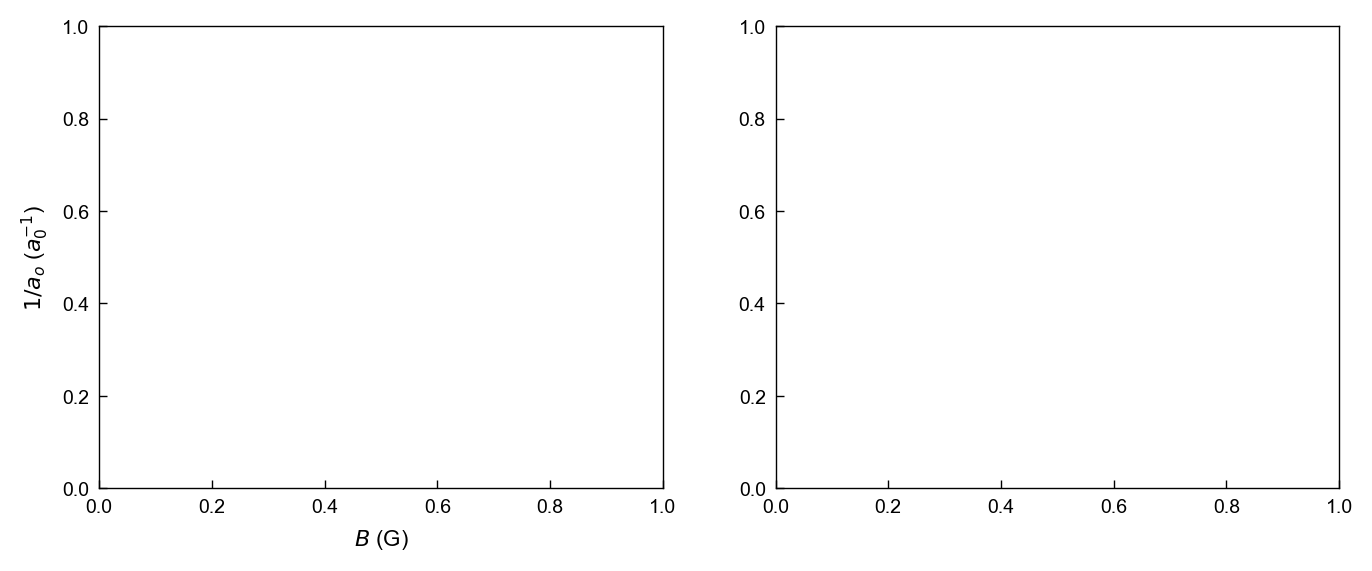

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

num = 1000
B = np.linspace(198, 203, 1000)  # G

ax = axs[0]
ax.set(ylabel=r"$1/a_o$ ($a_0^{-1}$)", xlabel=r"$B$ (G)")
ax.plot(B, a_0*inv_a_odd(B))
# ax.set_ylim(-3e2**3, 3e2**3)
# ax.legend(fontsize=8, loc="upper left")

ax = axs[1]
ax.set(ylabel=r"$r_o$ ($a_0$)", xlabel=r"$B$ (G)")
ax.plot(B, r_odd(B)/a_0)
# ax.plot(B, a_0/inv_R3D(B))
# ax.legend(fontsize=8, loc="upper left")

fig.tight_layout()
# fig.savefig("breit_rabi.png", dpi=300)
plt.show()

### Plotting scattering amplitudes
Plot the quasi-one-dimensional scattering amplitudes like in Jackson et al. 2023 Fig. 3.

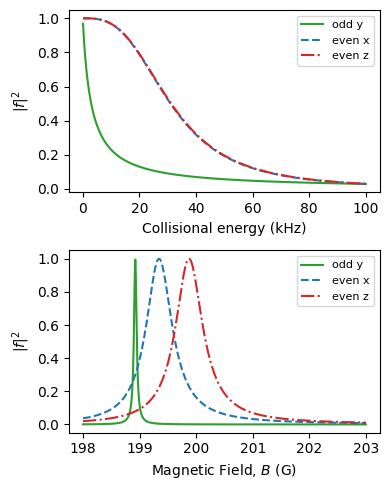

In [6]:
colour_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

colors = [colour_list[i] for i in [2, 0, 3]]

fig, axs = plt.subplots(2, 1, figsize=(4, 5))
num = 1000
B = np.linspace(198, 203, num)  # G
Ek = np.linspace(0.1, 100, num)  # kHz
Ek_typ = 10.0  # kHz

ax = axs[0]
ax.set(ylabel=r"$|f|^2$", xlabel=r"Collisional energy (kHz)")

ax.plot(Ek, np.abs(f_odd(Ek*h*1e3, B_res_odd))**2, '-',
        color=colors[0], label="odd y")
ax.plot(Ek, np.abs(f_even(Ek*h*1e3, B_res_even))**2, '--',
        color=colors[1], label="even x")
ax.plot(Ek, np.abs(f_even_m0(Ek*h*1e3, B_res_even_m0))**2, '-.',
        color=colors[2], label="even z")

ax.legend(fontsize=8, loc="upper right")

ax = axs[1]
ax.set(ylabel=r"$|f|^2$", xlabel=r"Magnetic Field, $B$ (G)")
ax.plot(B, np.abs(f_odd(Ek_typ*h*1e3, B))**2, '-',
        color=colors[0], label="odd y")
ax.plot(B, np.abs(f_even(Ek_typ*h*1e3, B))**2, '--',
        color=colors[1], label="even x")
ax.plot(B, np.abs(f_even_m0(Ek_typ*h*1e3, B))**2, '-.',
        color=colors[2], label="even z")

ax.legend(fontsize=8, loc="upper right")


fig.tight_layout()
# fig.savefig("q1d_scattering_ampitude.png", dpi=300)
plt.show()

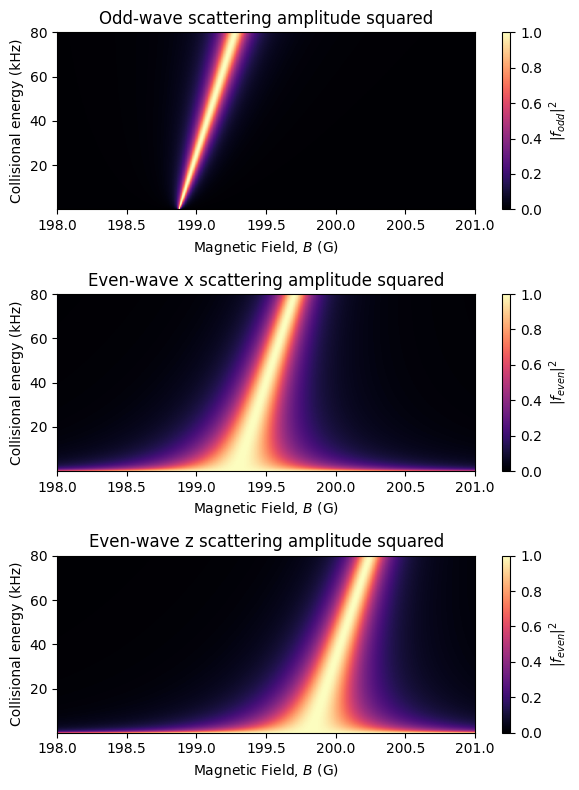

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(6, 8))
num = 1000
B = np.linspace(198, 201, num)  # G
Ek = np.linspace(0.1, 80, num)  # kHz

cmap = 'magma'

# Colormap of |f|^2 across (Ek, B) grid
def plot_2d_colormap(ax, x, y, Z, xlabel="", ylabel="", title="", colorbar_label=""):
    im = ax.pcolormesh(x, y, Z, shading='auto', cmap=cmap, 
                       norm=plt.Normalize(vmin=0, vmax=1.0))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(colorbar_label)


Z_odd = np.abs(f_odd(Ek[:, None]*h*1e3, B[None, :]))**2
plot_2d_colormap(axs[0], B, Ek, Z_odd,
                  xlabel=r"Magnetic Field, $B$ (G)",
                  ylabel=r"Collisional energy (kHz)",
                  title="Odd-wave scattering amplitude squared",
                  colorbar_label=r"$|f_{odd}|^2$")

Z_even = np.abs(f_even(Ek[:, None]*h*1e3, B[None, :]))**2
plot_2d_colormap(axs[1], B, Ek, Z_even,
                xlabel=r"Magnetic Field, $B$ (G)",
                ylabel=r"Collisional energy (kHz)",
                title="Even-wave x scattering amplitude squared",
                colorbar_label=r"$|f_{even}|^2$")

Z_even_m0 = np.abs(f_even_m0(Ek[:, None]*h*1e3, B[None, :]))**2
plot_2d_colormap(axs[2], B, Ek, Z_even_m0,
                 xlabel=r"Magnetic Field, $B$ (G)",
                ylabel=r"Collisional energy (kHz)",
                title="Even-wave z scattering amplitude squared",
                colorbar_label=r"$|f_{even}|^2$")

fig.tight_layout()
plt.show()

## Quasi-two-dimensional scattering z-confinement

In [12]:
from amo.quantum_gas import oscillator_length
from scipy.optimize import root_scalar
from amo.resonant_scattering import q2d_inverse_pwave_scattering_area, \
    q2d_pwave_ln_inverse_effective_range, \
    q2d_swave_ln_scattering_length_squared, \
    q2d_swave_effective_range
from amo.lattice import Lattice

s = 40  # In recoil energy
Lat = Lattice(s)
omega_perp = Lat.calculate_En(0)[0] * Lat.ER/hbar * 2  # Double the ground band energy
a_osc = oscillator_length(omega_perp) * np.sqrt(2)  # Reduced mass.

inv_a_p = lambda B: q2d_inverse_pwave_scattering_area(V3D(B), inv_R3D(B), a_osc)
ln_inv_r_p = lambda B: q2d_pwave_ln_inverse_effective_range(inv_R3D(B), a_osc)

ln_a_s_sq = lambda B: q2d_swave_ln_scattering_length_squared(V3D_m0(B), inv_R3D_m0(B), a_osc)
r_s = lambda B: q2d_swave_effective_range(inv_R3D_m0(B), a_osc)


In [66]:
s = 80  # In recoil energy
Lat = Lattice(s)
omega_perp = Lat.calculate_En(0)[0] * Lat.ER/hbar * 2  # Double the ground band energy

print(omega_perp / (2 * pi * 1e3))  # in kHz
print(2*np.sqrt(s*Lat.ER**2)/h/1e3)

print((Lat.calculate_En(0)[3] - Lat.calculate_En(0)[1])* Lat.ER/h/1e3/2)

129.4/154.37 * 2

149.92555854865225
154.37264626541858
129.38085258195943


1.6764915462849

q2D p-wave resonance at B = 198.711 G
q2D p-wave resonance shift is B_p^* = 0.411 G
q2D s-wave resonance at B = 200.071 G
q2D s-wave resonance shift is B_s^* = 1.268 G


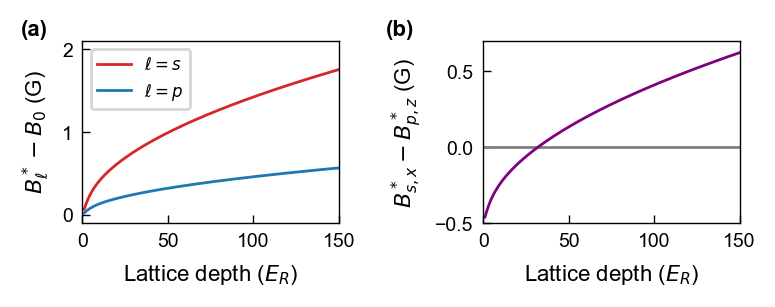

In [75]:
from amo.resonant_scattering import q2d_reference_field


B_ref_p = q2d_reference_field(0, omega_perp)
print(f"q2D p-wave resonance at B = {B_ref_p:.3f} G")
print(f"q2D p-wave resonance shift is B_p^* = {B_ref_p-B0_77_pm1:.3f} G")

B_ref_s = q2d_reference_field(1, omega_perp)
print(f"q2D s-wave resonance at B = {B_ref_s:.3f} G")
print(f"q2D s-wave resonance shift is B_s^* = {B_ref_s-B0_77_0:.3f} G")


fig, axs = plt.subplots(1, 2, figsize=(4, 1.5))

# z geometry
s_min = 0
s_max = 150
s = np.linspace(s_min+1, s_max, s_max-s_min)  # Recoils
Lats = [Lattice(s_) for s_ in s]
omega_perps = [Lats[i].calculate_En(0)[0] * Lats[i].ER/hbar * 2 for i in range(len(Lats))]

B_p_shifts = -B0_77_pm1 + np.array([q2d_reference_field(0, omega_perp) for omega_perp in omega_perps])
B_s_shifts = -B0_77_0 + np.array([q2d_reference_field(1, omega_perp) for omega_perp in omega_perps])

ax = axs[0]
ax.set(ylabel=r"$B_\ell^* - B_0$ (G)", xlabel=r"Lattice depth ($E_R$)",
       xlim=(s_min, s_max), ylim=(-0.1, 2.1))
ax.plot(s, B_s_shifts, '-', label=r"$\ell=s$", color=colors[3])
ax.plot(s, B_p_shifts, '-', label=r"$\ell=p$", color=colors[0])
ax.legend(fontsize=6, loc='upper left')

# x geometry
# s_min = 0
# s_max = 100
# s = np.linspace(s_min+1, s_max, s_max-s_min)  # Recoils
# Lats = [Lattice(s_) for s_ in s]
# omega_perps = [Lats[i].calculate_En(0)[0] * Lats[i].ER/hbar * 2 for i in range(len(Lats))]

B_pz = np.array([q2d_reference_field(0, omega_perp, geometry='x') for omega_perp in omega_perps])
B_sx = np.array([q2d_reference_field(1, omega_perp, geometry='x') for omega_perp in omega_perps])

ax = axs[1]
ax.set(ylabel=r"$B_{s,x}^* - B_{p,z}^*$ (G)", xlabel=r"Lattice depth ($E_R$)",
       xlim=(s_min, s_max), ylim=(-0.5, 0.7))
ax.hlines(0, s_min, s_max, colors='gray', linestyles='-')
ax.plot(s, B_sx - B_pz, '-', color='purple')

fig.tight_layout()

subplot_labels = ['(a)', '(b)']
x_offsets = [-0.24, -0.38]
for ax, label, x_offset in zip(axs, subplot_labels, x_offsets):
	ax.text(x_offset, 1.03, label, transform=ax.transAxes, fontweight='bold', fontsize=8)
	
plt.subplots_adjust(top=0.90)

fig.savefig("outputs/q2d_resonance_shifts.pdf")
plt.show()

In [47]:
(B_sx - B_pz)[32]
s[31]
s[32]

np.float64(32.733333333333334)

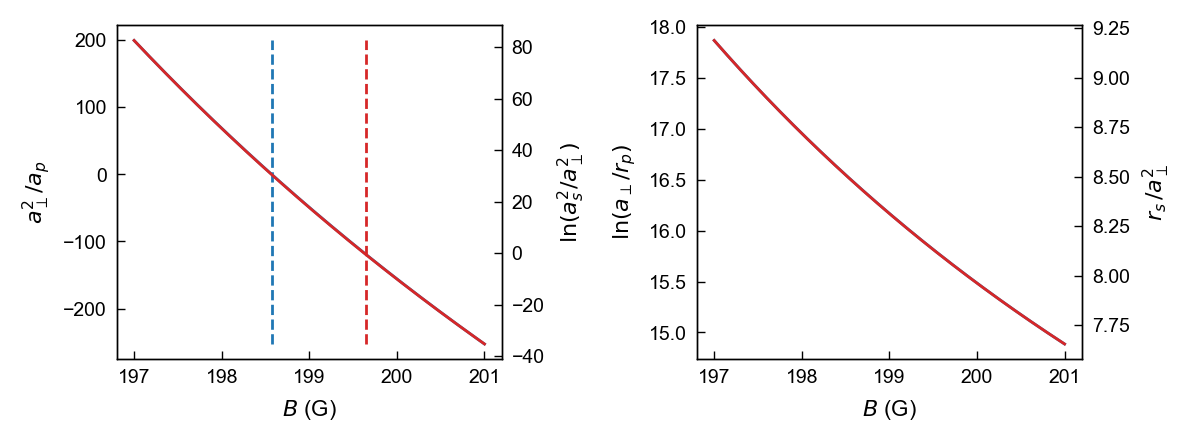

In [8]:
fig, axs = plt.subplots(1, 2, figsize=figsize)
# axs = axes.flatten()

num = 1000

## p-Wave
B = np.linspace(197, 201, 1000)  # G

color = colors[0]

ax = axs[0]
ax.set(ylabel=r"$a_\perp^2/a_p$", xlabel=r"$B$ (G)")
y = a_osc**2*inv_a_p(B)
ax.plot(B, y, color=color)
ax.vlines(B_ref_p, np.min(y), np.max(y), linestyle='--', color=color)
# ax.set_ylim(-3e2**3, 3e2**3)
# ax.legend(fontsize=8, loc="upper left")

ax = axs[1]
ax.set(ylabel=r"$\ln(a_\perp/r_p)$", xlabel=r"$B$ (G)")
y = ln_inv_r_p(B)
ax.plot(B, y, color=color)
# ax.plot(B, a_0/inv_R3D(B))
# ax.legend(fontsize=8, loc="upper left")

## s-Wave
# B = np.linspace(198, 201, 1000)  # G

color = colors[3]

ax = axs[0].twinx()
ax.set(ylabel=r"$\ln(a_s^2/a_\perp^2)$")
y = ln_a_s_sq(B)
ax.plot(B, y, color=color)
ax.vlines(B_ref_s, np.min(y), np.max(y), linestyle='--', color=color)
# ax.set_ylim(-3e2**3, 3e2**3)
# ax.legend(fontsize=8, loc="upper left")

ax = axs[1].twinx()
ax.set(ylabel=r"$r_s\,/a_\perp^2$", xlabel=r"$B$ (G)")
ax.plot(B, r_s(B)/a_osc**2, color=color)
# ax.plot(B, a_0/inv_R3D(B))
# ax.legend(fontsize=8, loc="upper left")

fig.tight_layout()
# fig.savefig("q2d_scattering_parameters.pdf")
plt.show()